<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [4]:
# Print unique values in 'ConvertedCompYearly'
print(df['ConvertedCompYearly'].unique())
print(df.shape)

[    nan   7322.  30074. ...  15637.   9711. 116844.]
(65437, 114)


In [5]:
# Drop rows where 'ConvertedCompYearly' is NA
df_cleaned = df.dropna(subset=['ConvertedCompYearly'])

# Get summary statistics of the 'ConvertedCompYearly' column
summary_stats = df_cleaned['ConvertedCompYearly'].describe()

print(df_cleaned.shape)
print(summary_stats)

(23435, 114)
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


In [6]:
# Calculate the IQR
Q1 = df_cleaned['ConvertedCompYearly'].quantile(0.25)
Q3 = df_cleaned['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# remove outliers beyond 1.5
df_cleaned = df_cleaned[(df_cleaned['ConvertedCompYearly'] >= (Q1 - 1.5 * IQR)) & 
                        (df_cleaned['ConvertedCompYearly'] <= (Q3 + 1.5 * IQR))]

print(df_cleaned.shape)
print(summary_stats)

(22457, 114)
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


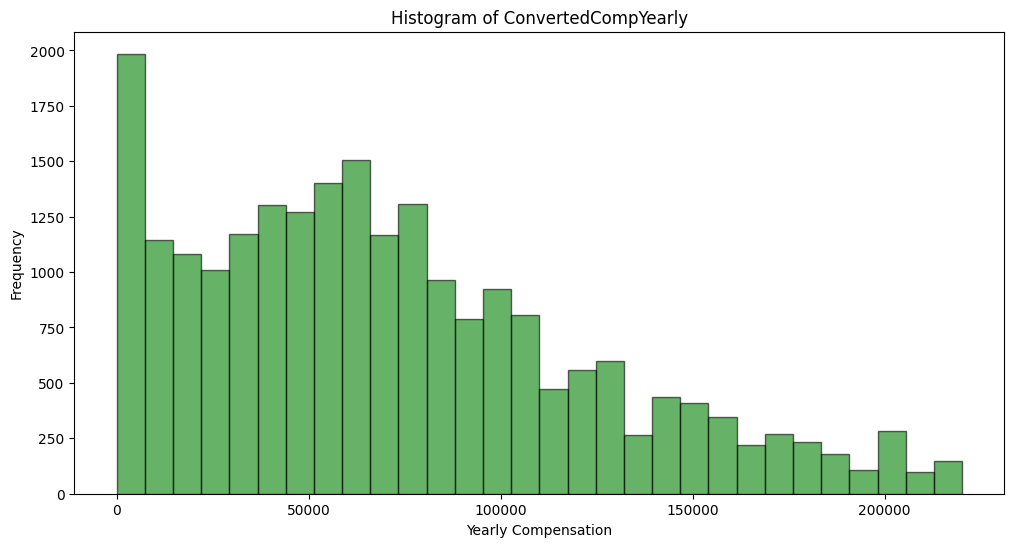

In [17]:
## Write your code here

plt.figure(figsize=(12, 6))

# Plotting the histogram
plt.hist(df_cleaned['ConvertedCompYearly'].dropna(), bins=30, alpha=0.6, color='g', edgecolor='black', label='Histogram')

# Customizing the plot
plt.title('Histogram of ConvertedCompYearly')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')

plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [24]:
## Write your code here

# Filter data for 'Employed, full-time'
df_full_time = df_cleaned[df_cleaned['Employment'] == 'Employed, full-time']

# Calculate the median compensation
median_compensation = df_full_time['ConvertedCompYearly'].median()

print(median_compensation)

66769.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [26]:
# Print unique values in the 'Country' column
unique_countries = df_cleaned['Country'].unique()
print(unique_countries)

['Pakistan' 'Austria' 'Turkey' 'France' 'United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Bulgaria'
 'Greece' 'Brazil' 'Germany' 'Italy' 'Ukraine' 'Russian Federation'
 'South Africa' 'Czech Republic' 'Iran, Islamic Republic of...' 'Canada'
 'Dominican Republic' 'Switzerland' 'Belgium' 'Peru' 'Bolivia' 'Morocco'
 'India' 'Luxembourg' 'Georgia' 'Saudi Arabia' 'Ireland' 'Romania' 'Spain'
 'Cyprus' 'Paraguay' 'Lithuania' 'Netherlands' 'Slovenia'
 'Venezuela, Bolivarian Republic of...' 'Japan' 'Latvia' 'Sweden'
 'Costa Rica' 'Poland' 'Norway' 'Portugal' 'Finland' 'Israel' 'Nicaragua'
 'Serbia' 'Croatia' 'Hungary' 'Bangladesh' 'Indonesia' 'Denmark'
 'Bosnia and Herzegovina' 'Mexico' 'Philippines' 'Thailand' 'Slovakia'
 'El Salvador' 'Ecuador' 'Argentina' 'Algeria' 'Kazakhstan' 'Malaysia'
 'Zimbabwe' 'Afghanistan' 'Malta' 'Belarus' 'Colombia' 'Egypt'
 'Montenegro' 'Australia' 'Isle of Man' 'New Zealand' 'Palestine'
 'Armenia' 'Maldives' 'United Arab Emirates

In [27]:
# Map countries to regions
region_mapping = {
    'Africa': [
        'Algeria', 'Nigeria', 'South Africa', 'Egypt', 'Kenya', 'Ethiopia',
        'Morocco', 'Tunisia', 'Uganda', 'Tanzania', 'Ghana', 'Cameroon',
        'Zimbabwe', 'Senegal', 'Sudan', 'Zambia', 'Botswana', 'Rwanda'
    ],
    'Asia': [
        'India', 'China', 'Japan', 'Malaysia', 'Singapore', 'Pakistan',
        'Indonesia', 'Philippines', 'Thailand', 'Bangladesh', 'Vietnam',
        'Sri Lanka', 'Saudi Arabia', 'United Arab Emirates', 'Iran, Islamic Republic of...',
        'Korea, Republic of', 'Israel'
    ],
    'Europe': [
        'United Kingdom of Great Britain and Northern Ireland', 'Germany', 'France',
        'Italy', 'Spain', 'Netherlands', 'Switzerland', 'Sweden', 'Norway',
        'Poland', 'Ireland', 'Austria', 'Belgium', 'Finland', 'Denmark',
        'Portugal', 'Ukraine', 'Czech Republic', 'Romania', 'Greece', 'Russia'
    ],
    'North America': [
        'United States of America', 'Canada', 'Mexico'
    ],
    'South America': [
        'Brazil', 'Argentina', 'Chile', 'Colombia', 'Peru', 'Ecuador', 'Venezuela, Bolivarian Republic of...'
    ],
    'Oceania': [
        'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea'
    ],
    'Nomadic': ['Nomadic']
}

/tmp/ipykernel_622/1257424749.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Region'] = df_cleaned['Country'].apply(map_region)


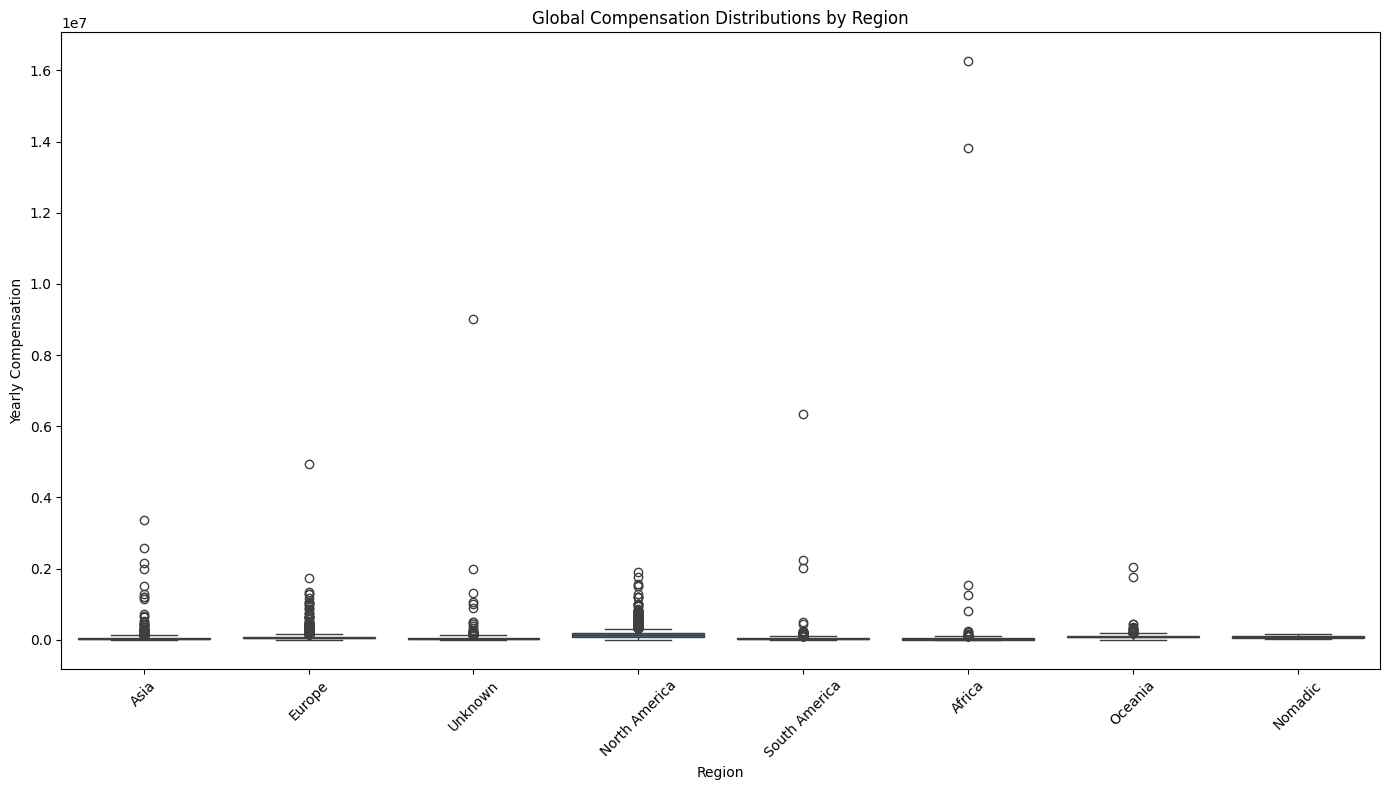

In [28]:
## Write your code here

# Filter out rows with NA in 'ConvertedCompYearly' and 'Country' for cleaner data
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'Country'])

# Map countries to their respective regions/continents
def map_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'Unknown'  # For countries not in the mapping

# Apply the mapping to create a new 'Region' column
df_cleaned['Region'] = df_cleaned['Country'].apply(map_region)

# Create a boxplot to compare compensation distributions across regions
plt.figure(figsize=(14, 8))

# Creating the box plot
sns.boxplot(data=df_cleaned, x='Region', y='ConvertedCompYearly')

# Customizing the plot
plt.title('Global Compensation Distributions by Region')
plt.xlabel('Region')
plt.ylabel('Yearly Compensation')
plt.xticks(rotation=45)  # Rotate region labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [29]:
## Write your code here

# Calculate the IQR
Q1 = df_cleaned['ConvertedCompYearly'].quantile(0.25)
Q3 = df_cleaned['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# remove outliers beyond 1.5
df_cleaned = df_cleaned[(df_cleaned['ConvertedCompYearly'] >= (Q1 - 1.5 * IQR)) & 
                        (df_cleaned['ConvertedCompYearly'] <= (Q3 + 1.5 * IQR))]

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


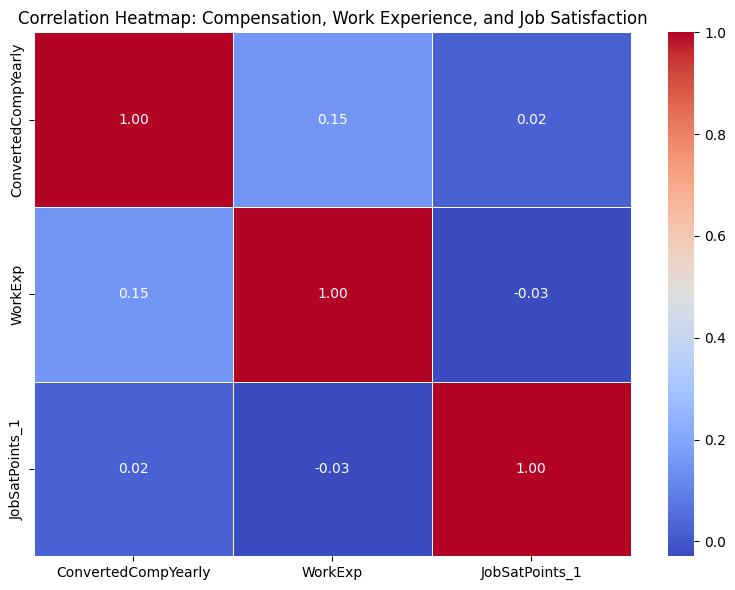

In [32]:
## Write your code here

# Filter out rows with NA
df_cleaned = df.dropna(subset=['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1'])

# Calculate correlation matrix
correlation_matrix = df_cleaned[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Customizing plot
plt.title('Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction')
plt.tight_layout()

plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


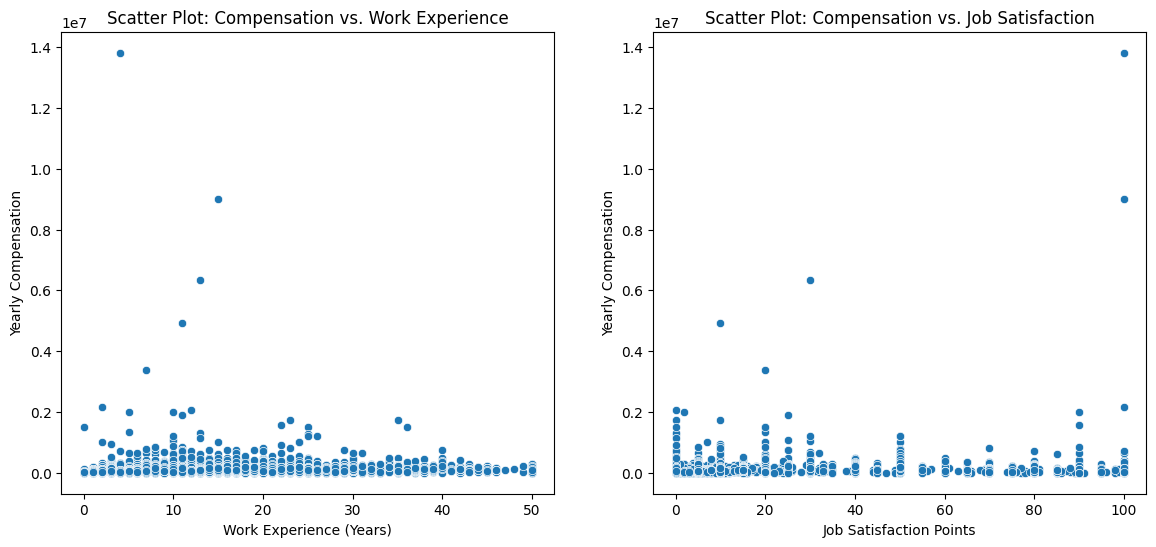

In [35]:
## Write your code here

# Set up the figure for subplots
plt.figure(figsize=(14, 6))

# Scatter plot between ConvertedCompYearly and WorkExp
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_cleaned, x='WorkExp', y='ConvertedCompYearly')
plt.title('Scatter Plot: Compensation vs. Work Experience')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation')

# Scatter plot between ConvertedCompYearly and JobSatPoints_1
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_cleaned, x='JobSatPoints_1', y='ConvertedCompYearly')
plt.title('Scatter Plot: Compensation vs. Job Satisfaction')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Yearly Compensation')

plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
